In [106]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.linalg import norm
import matplotlib.colors as mcolors

In [107]:
plt.style.use('../mplt.mplstyle')


In [184]:
def load_orbits(model, orbit='all'):
    vasiliev_path = '../../../Vasiliev23/'
    nico_path = '../../Cranes/cranes/data/orbits/'
    if model == 'V23L2M10':    
        orbit_mwlmc = np.loadtxt(vasiliev_path + 'L2M10/trajlmc.txt')
    elif model == 'V23L2M11':
        orbit_mwlmc = np.loadtxt(vasiliev_path + 'L2M11/trajlmc.txt')
    elif model == 'V23L3M11':
        orbit_mwlmc = np.loadtxt(vasiliev_path + 'L3M10/trajlmc.txt')
    elif model == 'V23L3M11':
        orbit_mwlmc = np.loadtxt(vasiliev_path + 'L3M11/trajlmc.txt')
    elif model == 'GC21M1b0':
        orbit_mw = np.genfromtxt(nico_path + "LMC3_orbit_host_interp_b0.txt")
        orbit_lmc = np.loadtxt(nico_path + "LMC3_orbit_sat_interp_b0.txt")
    elif model == 'GC21M2b0':
        orbit_lmc = np.loadtxt(nico_path + "LMC4_orbit_sat_interp_b0.txt")
        orbit_mw = np.loadtxt(nico_path + "LMC4_orbit_host_interp_b0.txt")
    elif model == 'GC21M3b0':
        orbit_mw = np.loadtxt(nico_path + "LMC5_orbit_host_interp_b0.txt")
        orbit_lmc = np.loadtxt(nico_path + "LMC5_orbit_sat_interp_b0.txt")
    elif model == 'GC21M4b0':
        orbit_mw = np.loadtxt(nico_path + "LMC6_orbit_host_interp_b0.txt")
        orbit_lmc = np.loadtxt(nico_path + "LMC6_orbit_sat_interp_b0.txt")

    elif model == 'GC21M1b1':
        orbit_mw = np.genfromtxt(nico_path + "LMC3_orbit_host_interp_b1.txt")
        orbit_lmc = np.loadtxt(nico_path + "LMC3_orbit_sat_interp_b1.txt")
    elif model == 'GC21M2b1':
        orbit_mw = np.genfromtxt(nico_path + "LMC4_orbit_host_interp_b1.txt")
        orbit_lmc = np.loadtxt(nico_path + "LMC4_orbit_sat_interp_b1.txt")
    elif model == 'GC21M3b1':
        orbit_mw = np.genfromtxt(nico_path + "LMC5_orbit_host_interp_b1.txt")
        orbit_lmc = np.loadtxt(nico_path + "LMC5_orbit_sat_interp_b1.txt")
    elif model == 'GC21M4b1':
        orbit_mw = np.genfromtxt(nico_path + "LMC6_orbit_host_interp_b1.txt")
        orbit_lmc = np.loadtxt(nico_path + "LMC6_orbit_sat_interp_b1.txt")
    if orbit == 'relative':
        orbit_mwlmc = orbit_lmc - orbit_mw
        return orbit_mwlmc
    elif orbit == 'mw':
        return orbit_mw
    elif orbit == 'lmc':
        return orbit_lmc
    elif orbit == 'all':
        return orbit_mw, orbit_lmc, orbit_lmc - orbit_mw


In [185]:
models = ['GC21M1b0', 'GC21M2b0', 'GC21M3b0', 'GC21M4b0', 'GC21M1b1', 'GC21M2b1', 'GC21M3b1', 'GC21M4b1', 'V23L2M10', 'V23L2M11'
          , 'V23L3M10', 'V23L3M11']

In [186]:
np.argmin(np.abs(norm(mwlmc_orbit[:120,3:], axis=1)-vlmc_obs))

119

GC21M1b1 87 79 93.0
[  -4.85667946  -52.43604824  -12.3792054   -61.4321486  -234.45753577
  248.10549083]
----------
GC21M2b1 111 102 114.0
[  -1.87804858  -38.98734551  -23.83134791  -76.67208644 -280.08013092
  229.99981332]
----------
GC21M3b1 105 97 111.0
[  -4.57113103  -50.59946961  -15.8829451   -59.57176178 -237.0613057
  240.63990889]
----------
GC21M4b1 110 101 114.0
[  -3.80041285  -47.95318982  -16.74816009  -60.42199513 -243.1000105
  246.62908363]
----------


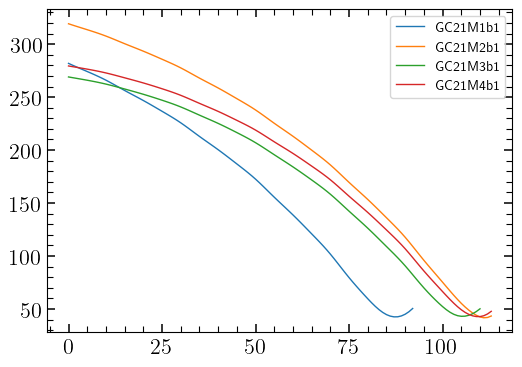

In [187]:
ar = np.ones(115)
bps_GC21 = np.zeros(8)
time=np.arange(0, 4, 0.02)
header = '# time [Gyr], x[kpc], y[kpc], z[kpc], vx[km/s], vy[km/s], vz[km/s]'
i=0
for m in models[4:8]:
    mw_orbit, lmc_orbit, mwlmc_orbit = load_orbits(model=m, orbit='all')
    #print(mwlmc_orbit[91], norm(mwlmc_orbit[:,:3], axis=1))
    bpos = np.argmin(norm(mwlmc_orbit[:115,:3], axis=1) - rlmc_obs)
    bvel = np.argmin(np.abs(norm(mwlmc_orbit[:115,3:], axis=1) - vlmc_obs))
    bps_GC21[i] = np.argmin(np.abs(norm(mwlmc_orbit[:115,:]-np.array([-0.97*ar, -41*ar, -27.8*ar, -57*ar, -226*ar, 221*ar]).T, axis=1)))
    plt.plot(norm(mwlmc_orbit[:int(bps_GC21[i]),:3], axis=1), lw=1, label=m)
    print(m, bpos, bvel, bps_GC21[i])
    print(mwlmc_orbit[int(bps_GC21[i])])
    idx = int(bps_GC21[i])
    np.savetxt(m+'_orbit_mw.txt', np.array([time[:idx+1]-time[idx], mw_orbit[:idx+1,0], mw_orbit[:idx+1,1], mw_orbit[:idx+1,2],
                                            mw_orbit[:idx+1,3], mw_orbit[:idx+1,4], mw_orbit[:idx+1,5]]).T, comments=header)
    np.savetxt(m+'_orbit_lmc.txt', np.array([time[:idx+1]-time[idx], lmc_orbit[:idx+1,0], lmc_orbit[:idx+1,1], lmc_orbit[:idx+1,2],
                                            lmc_orbit[:idx+1,3], lmc_orbit[:idx+1,4], lmc_orbit[:idx+1,5]]).T, comments=header)
    print('----------')
    i+=1
plt.legend()
plt.show()

In [113]:
test_orbit = np.loadtxt(models[0] + '_orbit_mw.txt')

In [119]:
test_orbit[:,3]

array([-1.92224169, -1.94416301, -1.96318666, -1.97984592, -1.99467409,
       -2.00820446, -2.02097031, -2.03350494, -2.04634164, -2.0600137 ,
       -2.07505441, -2.09175098, -2.10940638, -2.12707747, -2.14382114,
       -2.15869427, -2.17106364, -2.18153568, -2.19102674, -2.20045316,
       -2.21073127, -2.22250083, -2.23529528, -2.24837145, -2.26098618,
       -2.27239633, -2.28210227, -2.29057863, -2.29854357, -2.30671527,
       -2.31581187, -2.32632253, -2.33782029, -2.34964914, -2.36115311,
       -2.37167621, -2.38074046, -2.38857997, -2.39560688, -2.40223332,
       -2.40887141, -2.41591701, -2.42370081, -2.43253723, -2.44274069,
       -2.45462561, -2.46839486, -2.48380524, -2.50050201, -2.51813041,
       -2.53633571, -2.55489837, -2.57413971, -2.59451629, -2.61648462,
       -2.64050126, -2.66695401, -2.69595581, -2.72755084, -2.76178333,
       -2.79869747, -2.83827537, -2.88025075, -2.92429522, -2.97008042,
       -3.01727796, -3.06603752, -3.11842107, -3.17696862, -3.24

In [148]:
colors = ['coral', 'purple', 'teal', 'royalblue', 'slategray']
for c in colors:
    print(c, mcolors.CSS4_COLORS[c])

coral #FF7F50
purple #800080
teal #008080
royalblue #4169E1
slategray #708090


In [125]:
def load_orbits(model, orbit='all'):
    vasiliev_path = '../../../Vasiliev23/'
    GC21_path = './'
    if model == 'V23L2M10':    
        orbit_mwlmc = np.loadtxt(vasiliev_path + 'L2M10/trajlmc.txt')
    elif model == 'V23L2M11':
        orbit_mwlmc = np.loadtxt(vasiliev_path + 'L2M11/trajlmc.txt')
    elif model == 'V23L3M10':
        orbit_mwlmc = np.loadtxt(vasiliev_path + 'L3M10/trajlmc.txt')
    elif model == 'V23L3M11':
        orbit_mwlmc = np.loadtxt(vasiliev_path + 'L3M11/trajlmc.txt')
    else:
        orbit_mw = np.genfromtxt(GC21_path + model+"_orbit_mw.txt")
        orbit_lmc = np.genfromtxt(GC21_path + model+"_orbit_lmc.txt")
        orbit_mwlmc = np.copy(orbit_lmc)
        orbit_mwlmc[:,1:] -= orbit_mw[:,1:]

    if orbit == 'relative':
        return orbit_mwlmc
    elif orbit == 'mw':
        return orbit_mw
    elif orbit == 'lmc':
        return orbit_lmc
    elif orbit == 'all':
        return orbit_mw, orbit_lmc, orbit_mwlmc

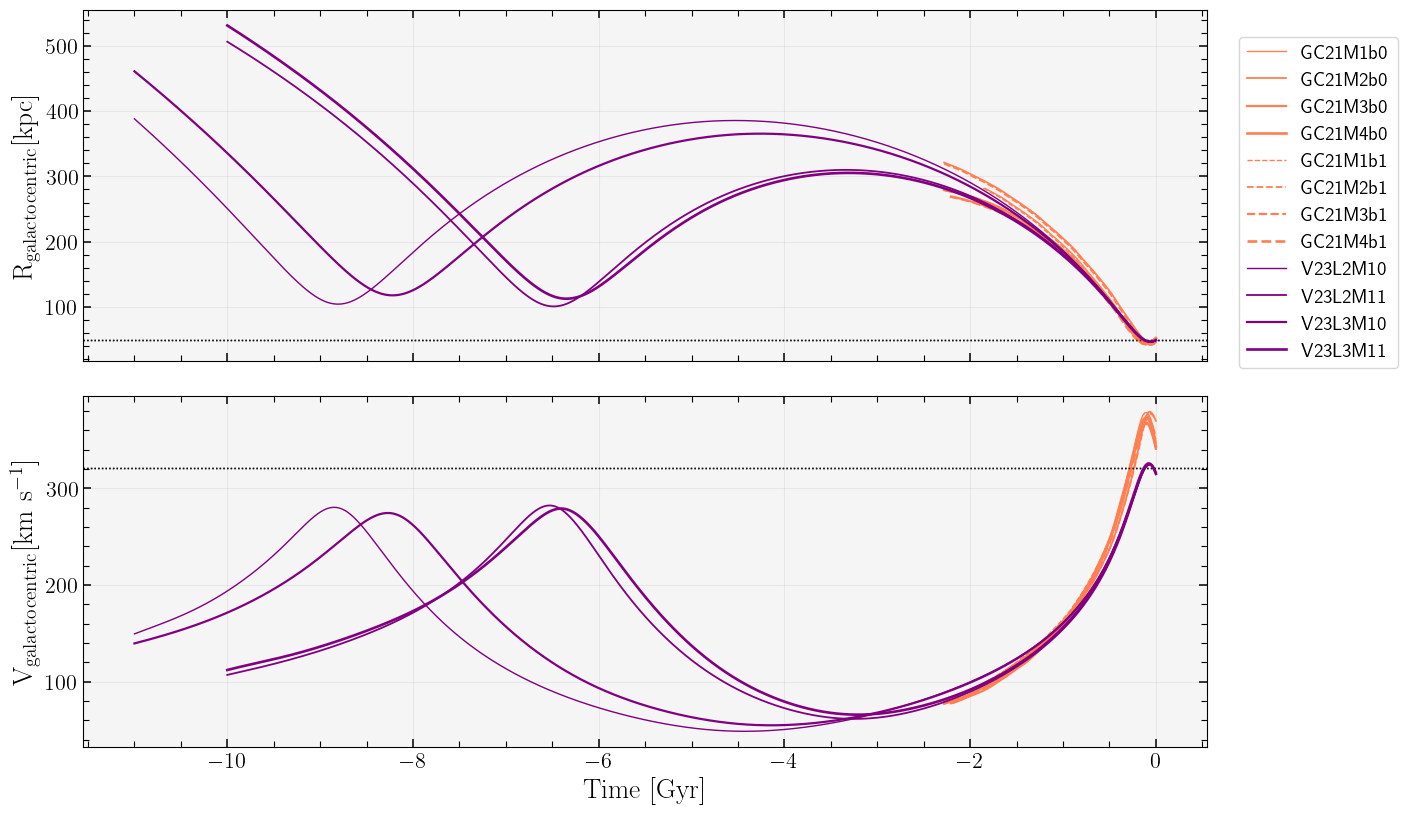

In [177]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax[0].grid(alpha=0.2)
ax[1].grid(alpha=0.2)
colors = ['coral', 'coral', 'coral', 'coral', 'coral', 'coral', 'coral', 'coral', 'purple', 'purple', 'purple', 'purple']
lss = ['-', '-', '-', '-', '--', '--', '--', '--', '-', '-', '-', '-']
lws = [1, 1.3, 1.6, 1.9, 1, 1.3, 1.6, 1.9, 1, 1.3, 1.6, 1.9]

i=0
plt.tight_layout()

for m in models:
    mwlmc_orbit = load_orbits(model=m, orbit='relative')
    ax[0].plot(mwlmc_orbit[:,0],norm(mwlmc_orbit[:,1:4], axis=1), lw=lws[i], label=m, c=colors[i], ls=lss[i])
    ax[1].plot(mwlmc_orbit[:,0],norm(mwlmc_orbit[:,4:7], axis=1), lw=lws[i], label=m, c=colors[i], ls=lss[i])
    ax[0].axhline(rlmc_obs, c='k', ls=':', alpha=0.2, lw=1)
    ax[1].axhline(vlmc_obs, c='k', ls=':', alpha=0.2, lw=1)
    i+=1
ax[0].legend(bbox_to_anchor=(1.02, 0.95), fontsize=14)
ax[1].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[0].set_ylabel(r'$\rm{R_{galactocentric} [kpc]}$')
ax[1].set_ylabel(r'$\rm{V_{galactocentric} [km\ s^{-1}]}$')
ax[0].set_facecolor('whitesmoke')
ax[1].set_facecolor('whitesmoke')
plt.savefig('all_LMC_orbits.pdf', bbox_inches='tight')

plt.show()

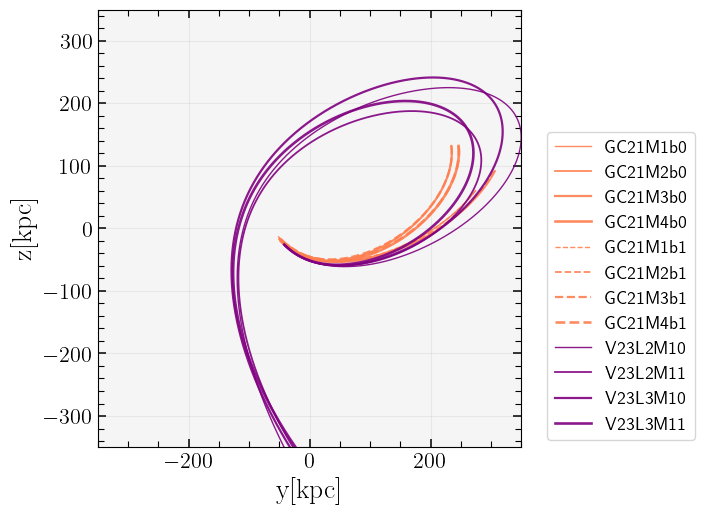

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharex=True)

ax.grid(alpha=0.2)
lss = ['-', '-', '-', '-', '--', '--', '--', '--', '-', '-', '-', '-']
colors = ['coral', 'coral', 'coral', 'coral', 'coral', 'coral', 'coral', 'coral', 'purple', 'purple', 'purple', 'purple']
lws = [1, 1.3, 1.6, 1.9, 1, 1.3, 1.6, 1.9, 1, 1.3, 1.6, 1.9]

i=0
plt.tight_layout()

for m in models:
    mwlmc_orbit = load_orbits(model=m, orbit='relative')
    ax.plot(mwlmc_orbit[:,2], mwlmc_orbit[:,3], label=m, c=colors[i],ls=lss[i], lw=lws[i], alpha=0.9)
    i+=1
ax.legend(bbox_to_anchor=(1.04, 0.74), fontsize=13)
ax.set_xlabel(r'$\rm{y [kpc]}$')
ax.set_ylabel(r'$\rm{z [kpc]}$')
ax.set_facecolor('whitesmoke')
ax.set_xlim(-350, 350)
ax.set_ylim(-350, 350)
plt.savefig('yz_proj_LMC_orbits.pdf', bbox_inches='tight')

plt.show()

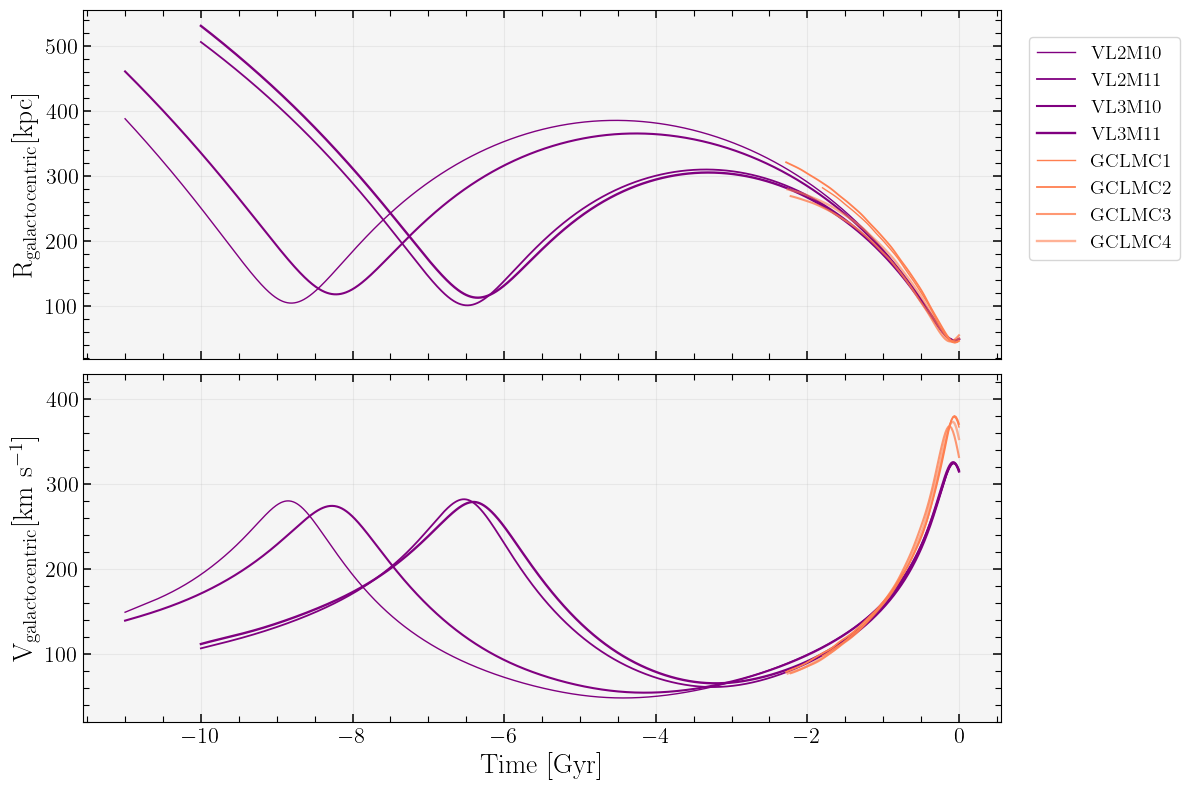

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax[0].plot(vasL2M10[:,0], np.sqrt(np.sum(vasL2M10[:,1:4]**2, axis=1)), label=r'$\rm{VL2M10}$', 
           c='purple', lw=1)
ax[0].plot(vasL2M11[:,0], np.sqrt(np.sum(vasL2M11[:,1:4]**2, axis=1)), label=r'$\rm{VL2M11}$', c='purple', 
           lw=1.3)
ax[0].plot(vasL3M10[:,0], np.sqrt(np.sum(vasL3M10[:,1:4]**2, axis=1)), label=r'$\rm{VL3M10}$', c='purple',
           lw = 1.5)
ax[0].plot(vasL3M11[:,0], np.sqrt(np.sum(vasL3M11[:,1:4]**2, axis=1)), label=r'$\rm{VL3M11}$', c='purple',
          lw=1.7)


ax[0].plot(tinterp[:91]-tinterp[90], f1(tinterp)[:91], c='coral', lw=1, label=r'$\rm{GCLMC1}$')
ax[0].plot(tinterp[:115]-tinterp[114], f2(tinterp)[:115], c='coral', lw=1.3, alpha=1, label=r'$\rm{GCLMC2}$')
ax[0].plot(tinterp[:112]-tinterp[111], f3(tinterp)[:112], c='coral', lw=1.5, alpha=0.8, label=r'$\rm{GCLMC3}$')
ax[0].plot(tinterp[:114]-tinterp[113], f4(tinterp)[:114], c='coral', lw=1.7, alpha=0.6, label=r'$\rm{GCLMC4}$')


#ax[0].plot(LMW21[:,0]-1.8, L21_LMCpos*220, c='darkorange', lw=1.8)


#ax[0].legend(ncol=2, fontsize=15)
ax[0].grid(alpha=0.2)

ax[1].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[0].set_ylabel(r'$\rm{R_{galactocentric} [kpc]}$')
ax[1].set_ylabel(r'$\rm{V_{galactocentric} [km\ s^{-1}]}$')



ax[1].plot(vasL2M10[:,0], np.sqrt(np.sum(vasL2M10[:,4:7]**2, axis=1)), 
           c='purple', lw=1)
ax[1].plot(vasL2M11[:,0], np.sqrt(np.sum(vasL2M11[:,4:7]**2, axis=1)),c='purple', 
           lw=1.3)
ax[1].plot(vasL3M10[:,0], np.sqrt(np.sum(vasL3M10[:,4:7]**2, axis=1)), c='purple',
           lw = 1.5)
ax[1].plot(vasL3M11[:,0], np.sqrt(np.sum(vasL3M11[:,4:7]**2, axis=1)), c='purple',
          lw=1.7)




ax[1].plot(tinterp[:91]-tinterp[90], f1v(tinterp)[:91], c='coral', lw=1)
ax[1].plot(tinterp[:115]-tinterp[114], f2v(tinterp)[:115], c='coral', lw=1.3, alpha=1)
ax[1].plot(tinterp[:112]-tinterp[111], f3v(tinterp)[:112], c='coral', lw=1.5, alpha=0.8)
ax[1].plot(tinterp[:114]-tinterp[113], f4v(tinterp)[:114], c='coral', lw=1.7, alpha=0.6)

#ax[1].plot(LMW21[:,0]-1.8, L21_LMCvel*160, c='darkorange', lw=1.8, label=r'$\rm{Lilleengen\ 21}$')


ax[1].grid(alpha=0.2)
ax[1].set_ylim(20, 430)
ax[0].legend(bbox_to_anchor=(1.02, 0.95), fontsize=14)


#ax[1].plot(nLMC3b0[:,7]-nLMC3b0[:,1], nLMC3b0[:,8]-nLMC3b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC1}$')
#ax[1].plot(nLMC4b0[:,7]-nLMC4b0[:,1], nLMC4b0[:,8]-nLMC4b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC2}$')
#ax[1].plot(nLMC5b0[:,7]-nLMC5b0[:,1], nLMC5b0[:,8]-nLMC5b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC3}$')
#ax[1].plot(nLMC6b0[:,7]-nLMC6b0[:,1], nLMC6b0[:,8]-nLMC6b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC4}$')

#ax[0].axvline(0, ls=':', c='k', alpha=0.6)

plt.tight_layout()
ax[0].set_facecolor('whitesmoke')
ax[1].set_facecolor('whitesmoke')

plt.savefig('all_LMC_orbits.pdf', bbox_inches='tight')
plt.show()


In [173]:
# 

#def escape_velocity(dist, model):
#    if model == 'GC23':
        

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(vasL2M10[:,2], vasL2M10[:,3], label=r'$\rm{Vasiliev\ L2M10}$')
ax[0].plot(vasL2M11[:,2], vasL2M11[:,3], label=r'$\rm{Vasiliev\ L2M11}$')
ax[0].plot(vasL3M10[:,2], vasL3M10[:,3], label=r'$\rm{Vasiliev\ L3M10}$')
ax[0].plot(vasL3M11[:,2], vasL3M11[:,3], label=r'$\rm{Vasiliev\ L3M11}$')


ax[0].plot(nLMC3b0[:,7]-nLMC3b0[:,1], nLMC3b0[:,8]-nLMC3b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC1}$')
ax[0].plot(nLMC4b0[:,7]-nLMC4b0[:,1], nLMC4b0[:,8]-nLMC4b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC2}$')
ax[0].plot(nLMC5b0[:,7]-nLMC5b0[:,1], nLMC5b0[:,8]-nLMC5b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC3}$')
ax[0].plot(nLMC6b0[:,7]-nLMC6b0[:,1], nLMC6b0[:,8]-nLMC6b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC4}$')



ax[1].plot(vasL2M10[:,1], vasL2M10[:,3], label=r'$\rm{Vasiliev\ L2M10}$')
ax[1].plot(vasL2M11[:,1], vasL2M11[:,3], label=r'$\rm{Vasiliev\ L2M11}$')
ax[1].plot(vasL3M10[:,1], vasL3M10[:,3], label=r'$\rm{Vasiliev\ L3M10}$')
ax[1].plot(vasL3M11[:,1], vasL3M11[:,3], label=r'$\rm{Vasiliev\ L3M11}$')


ax[1].plot(nLMC3b0[:,6]-nLMC3b0[:,0], nLMC3b0[:,8]-nLMC3b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC1}$')
ax[1].plot(nLMC4b0[:,6]-nLMC4b0[:,0], nLMC4b0[:,8]-nLMC4b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC2}$')
ax[1].plot(nLMC5b0[:,6]-nLMC5b0[:,0], nLMC5b0[:,8]-nLMC5b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC3}$')
ax[1].plot(nLMC6b0[:,6]-nLMC6b0[:,0], nLMC6b0[:,8]-nLMC6b0[:,2], ls='--', lw=2, label=r'$\rm{GC19\ LMC4}$')

ax[0].legend(ncol=2, fontsize=15)

IndexError: index 7 is out of bounds for axis 1 with size 6

In [18]:
### Present-day coordinates

In [31]:
rlmc_obs = 49.59
r_err = 0.54
vlmc_obs = 321
v_err = 24

In [139]:
stelea = [-1.04, -38.7, -27.5, -59.4, -208.8, 175.0]
gaia = [-1.078, -41, -27.82, -60.2, -216.6, 209.4]
gaia_err = [0.3, 0.2, 1.4, 10, 13.7, 18.4]
carr = [-0.17, -43.05, -26.48, 83.26, -223.55, 280.64]
CL18M1 = [-0.1-0.97, 4.0-41, 0.3-27, -11-57.4, -12.5-225.5, 34.3+220]
CL18M2 = [-0.4-0.97, 3.8-41, 2.0-27, 2.5-57.4, 6.9-225.5, 40.9+220]
CL18M3 = [-0.6-0.97, 3.1-41, 2.3-27, 3.2-57.4, 5.6-225.5, 42.9+220]
CL18M4 = [-0.2-0.97, 3.5-41, 1.8-27, -1.8-57.4, 7.7-225.5, 42.8+220]
CL18M5 = [-1.6-0.97, -0.6-41, 5.8-27, -4.2-57.4, -16.5-225.5, 50.4+220]
CL18M6 = [-1.1-0.97, 0.0-41, 3.9-27, 3.9-57.4, -32.9-225.5, 46.9+220]
print(CL18M1)
print(CL18M2)
print(CL18M3)
print(CL18M4)
print(CL18M5)
print(CL18M6)

[-1.07, -37.0, -26.7, -68.4, -238.0, 254.3]
[-1.37, -37.2, -25.0, -54.9, -218.6, 260.9]
[-1.5699999999999998, -37.9, -24.7, -54.199999999999996, -219.9, 262.9]
[-1.17, -37.5, -25.2, -59.199999999999996, -217.8, 262.8]
[-2.5700000000000003, -41.6, -21.2, -61.6, -242.0, 270.4]
[-2.0700000000000003, -41.0, -23.1, -53.5, -258.4, 266.9]


In [103]:
GC21M1r = f1(tinterp)[91]
GC21M1v = f1v(tinterp)[91]
GC21M2r = f2(tinterp)[116]
GC21M2v = f2v(tinterp)[116]
GC21M3r = f3(tinterp)[109]
GC21M3v = f3v(tinterp)[109]
GC21M4r = f4(tinterp)[113]
GC21M4v = f4v(tinterp)[113]

vasL2M10r = norm(vasL2M10[-1][1:4])
vasL2M10v = norm(vasL2M10[-1][4:7])
vasL2M11r = norm(vasL2M11[-1][1:4])
vasL2M11v = norm(vasL2M11[-1][4:7])
vasL3M10r = norm(vasL3M10[-1][1:4])
vasL3M10v = norm(vasL3M10[-1][4:7])
vasL3M11r = norm(vasL3M11[-1][1:4])
vasL3M11v = norm(vasL3M11[-1][4:7])

In [108]:
print(GC21M1r, GC21M1v)

48.92484349739821 358.8776953575288


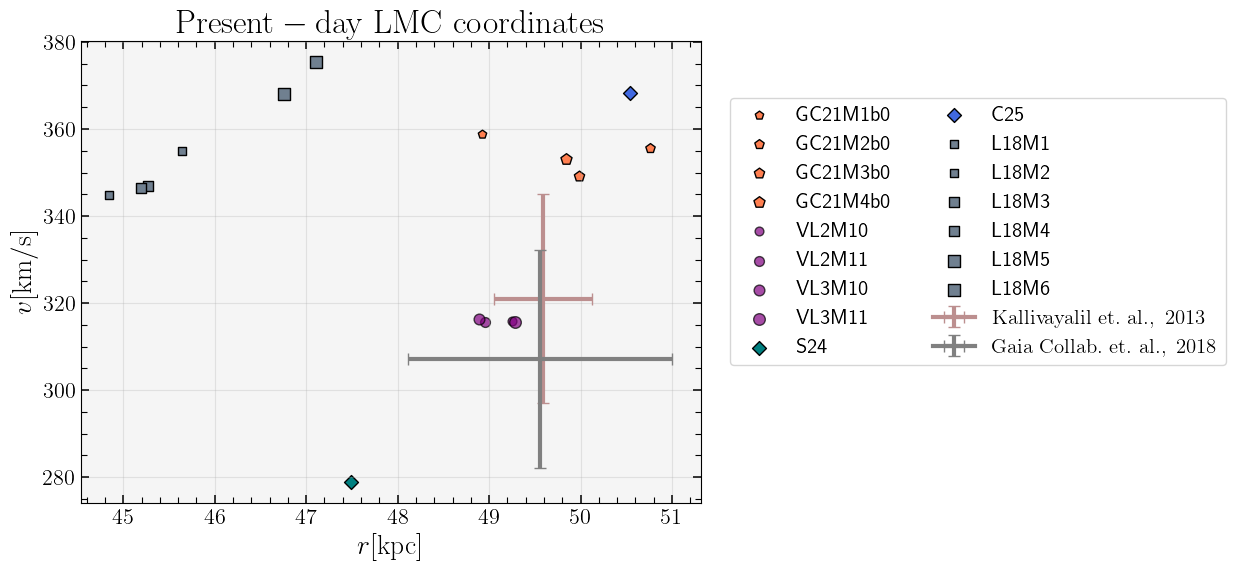

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.title(r'$\rm{Present-day\ LMC\ coordinates}$')
plt.grid(alpha=0.3)

plt.errorbar(x=rlmc_obs, y=vlmc_obs, xerr=r_err, yerr=v_err, capsize=4, c='rosybrown', label=r'$\rm{Kallivayalil\ et.\ al.,\ 2013}$')
plt.errorbar(x=norm(gaia[:3]), y=norm(gaia[3:]), xerr=norm(gaia_err[:3]), yerr=norm(gaia_err[3:]), capsize=4, c='grey', label=r'$\rm{Gaia\ Collab.\ et.\ al.,\ 2018}$')

plt.scatter(GC21M1r, GC21M1v, label='GC21M1b0', s=40, marker='p', edgecolors='k', color='coral')
plt.scatter(GC21M2r, GC21M2v, label='GC21M2b0', s=50, marker='p', edgecolors='k', color='coral')
plt.scatter(GC21M3r, GC21M3v, label='GC21M3b0', s=60, marker='p', edgecolors='k', color='coral')
plt.scatter(GC21M4r, GC21M4v, label='GC21M4b0', s=70, marker='p', edgecolors='k', color='coral')

plt.scatter(vasL2M10r, vasL2M10v, label='VL2M10', s=40, edgecolors='k', color='purple', alpha=0.7)
plt.scatter(vasL2M11r, vasL2M11v, label='VL2M11', s=50, edgecolors='k', color='purple', alpha=0.7)
plt.scatter(vasL3M10r, vasL3M10v, label='VL3M10', s=60, edgecolors='k', color='purple', alpha=0.7)
plt.scatter(vasL3M11r, vasL2M11v, label='VL3M11', s=70, edgecolors='k', color='purple', alpha=0.7)
plt.scatter(norm(stelea[:3]), norm(stelea[3:]), s=50, color='teal', edgecolors='k', marker='D', label='S24' )
plt.scatter(norm(carr[:3]), norm(carr[3:]), s=50, color='royalblue', edgecolors='k', marker='D', label='C25' )

plt.scatter(norm(CL18M1[:3]), norm(CL18M1[3:]), s=30, color='slategray', edgecolors='k', marker='s', label='L18M1' )
plt.scatter(norm(CL18M2[:3]), norm(CL18M2[3:]), s=40, color='slategray', edgecolors='k', marker='s', label='L18M2' )
plt.scatter(norm(CL18M3[:3]), norm(CL18M3[3:]), s=50, color='slategray', edgecolors='k', marker='s', label='L18M3' )
plt.scatter(norm(CL18M4[:3]), norm(CL18M4[3:]), s=60, color='slategray', edgecolors='k', marker='s', label='L18M4' )
plt.scatter(norm(CL18M5[:3]), norm(CL18M5[3:]), s=70, color='slategray', edgecolors='k', marker='s', label='L18M5' )
plt.scatter(norm(CL18M6[:3]), norm(CL18M6[3:]), s=80, color='slategray', edgecolors='k', marker='s', label='L18M6' )


ax.set_facecolor('whitesmoke')
ax.legend(bbox_to_anchor=(1.03, 0.9), fontsize=15, ncols=2)
plt.xlabel(r'$r\rm{[kpc]}$')
plt.ylabel(r'$v\rm{[km/s]}$')
plt.savefig('present_day_coordinates.pdf', bbox_inches='tight')
plt.show()